In [1]:
# 单细胞练习作业

In [44]:
import scanpy as sc

In [45]:
#创建data文件夹

In [4]:
!mkdir data

'wget' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


In [46]:
#创建write文件夹，用于保存结果

In [7]:
!mkdir write

In [47]:
import numpy as np
import pandas as pd

In [48]:
import anndata

In [49]:
adata = sc.read_10x_mtx(
    'data/filtered_gene_bc_matrices/hg19/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)                              # write a cache file for faster subsequent reading

In [50]:
adata

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

In [51]:
adata.obs

""
AAACATACAACCAC-1
AAACATTGAGCTAC-1
AAACATTGATCAGC-1
AAACCGTGCTTCCG-1
AAACCGTGTATGCG-1
...
TTTCGAACTCTCAT-1
TTTCTACTGAGGCA-1
TTTCTACTTCCTCG-1
TTTGCATGAGAGGC-1


In [52]:
adata.var

,gene_ids
MIR1302-10,ENSG00000243485
FAM138A,ENSG00000237613
OR4F5,ENSG00000186092
RP11-34P13.7,ENSG00000238009
RP11-34P13.8,ENSG00000239945
...,...
AC145205.1,ENSG00000215635
BAGE5,ENSG00000268590
CU459201.1,ENSG00000251180
AC002321.2,ENSG00000215616


In [53]:
#preprovessing

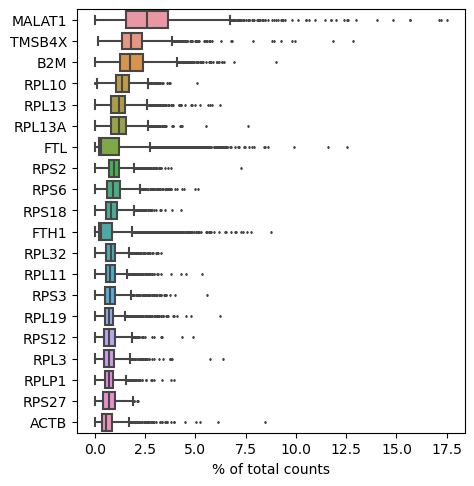

In [54]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [55]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

In [56]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

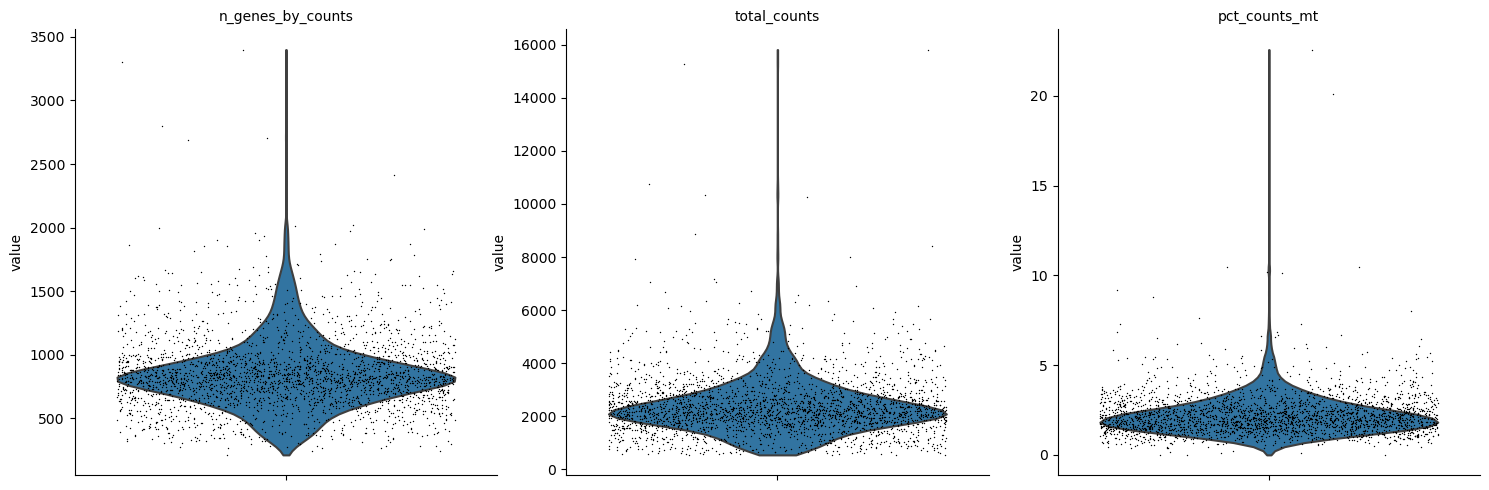

In [57]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [58]:
adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

In [59]:
sc.pp.normalize_total(adata, target_sum=1e4)

C:\Users\liliangcan\anaconda3\lib\site-packages\scanpy\preprocessing\_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [60]:
sc.pp.log1p(adata)

In [61]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

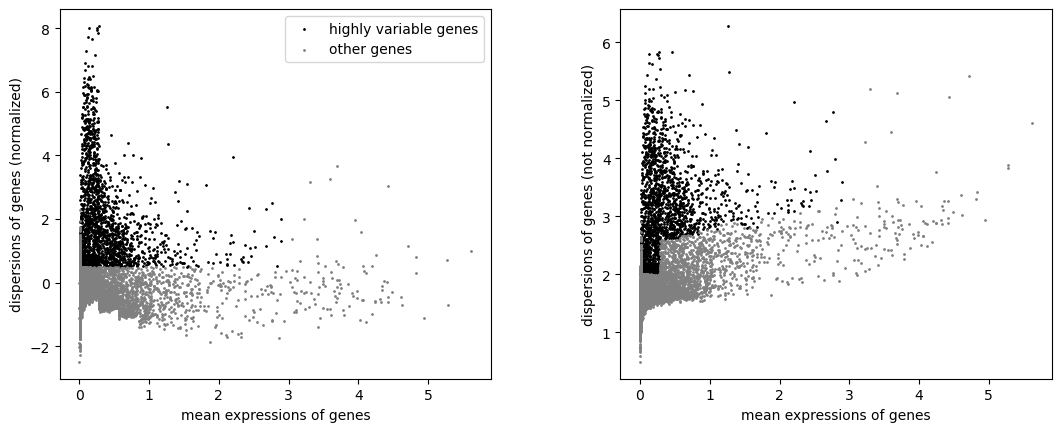

In [62]:
sc.pl.highly_variable_genes(adata)

In [63]:
adata = adata[:, adata.var.highly_variable]

In [64]:
#2 Dimensinality reduction

In [65]:
sc.tl.pca(adata, svd_solver='arpack')

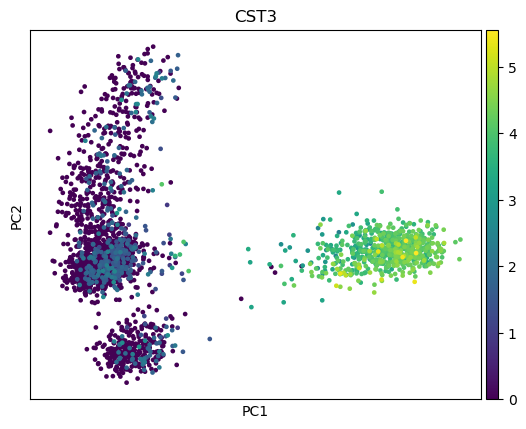

In [66]:
sc.pl.pca(adata, color='CST3')

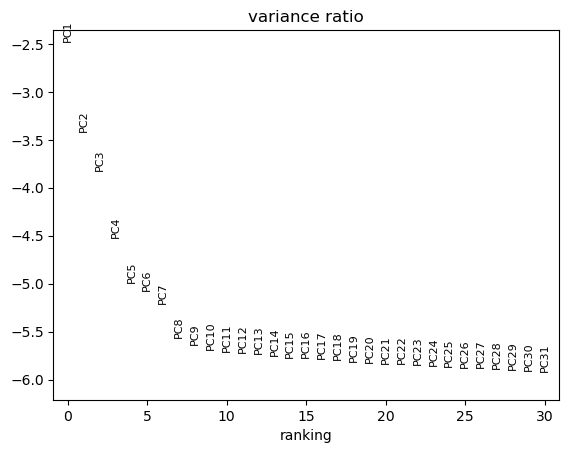

In [67]:
sc.pl.pca_variance_ratio(adata, log=True)

In [68]:
# 3 clustering

In [69]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

In [70]:
sc.tl.umap(adata)

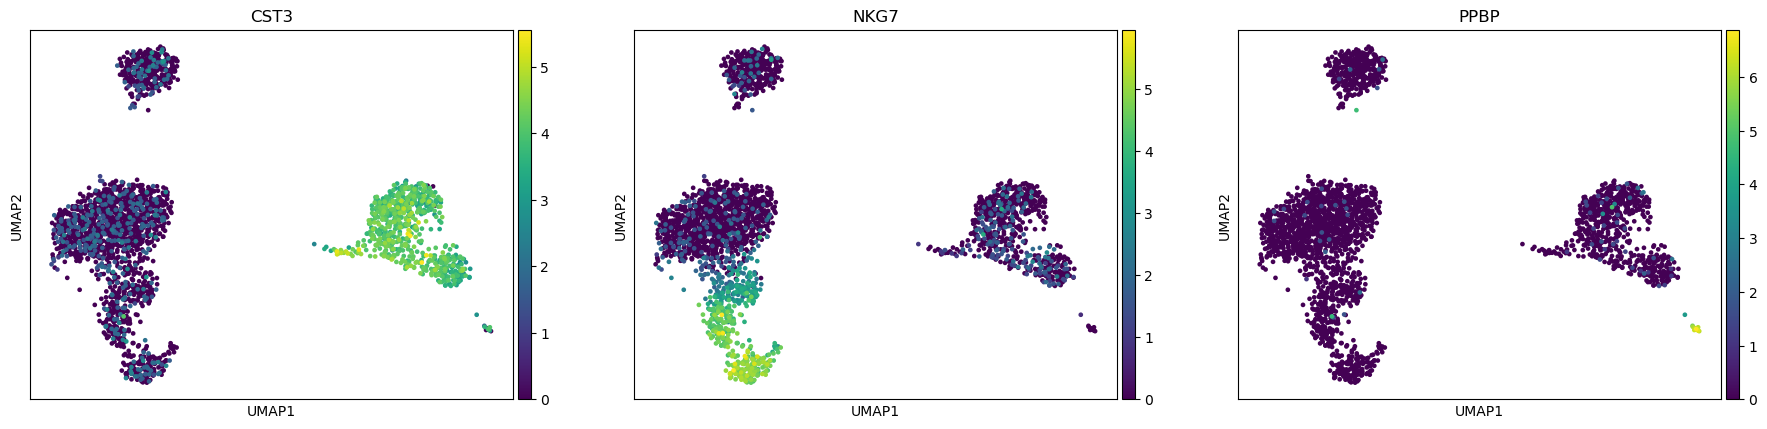

In [71]:
sc.pl.umap(adata, color=['CST3', 'NKG7', 'PPBP'])

In [72]:
sc.tl.leiden(adata)

C:\Users\liliangcan\anaconda3\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


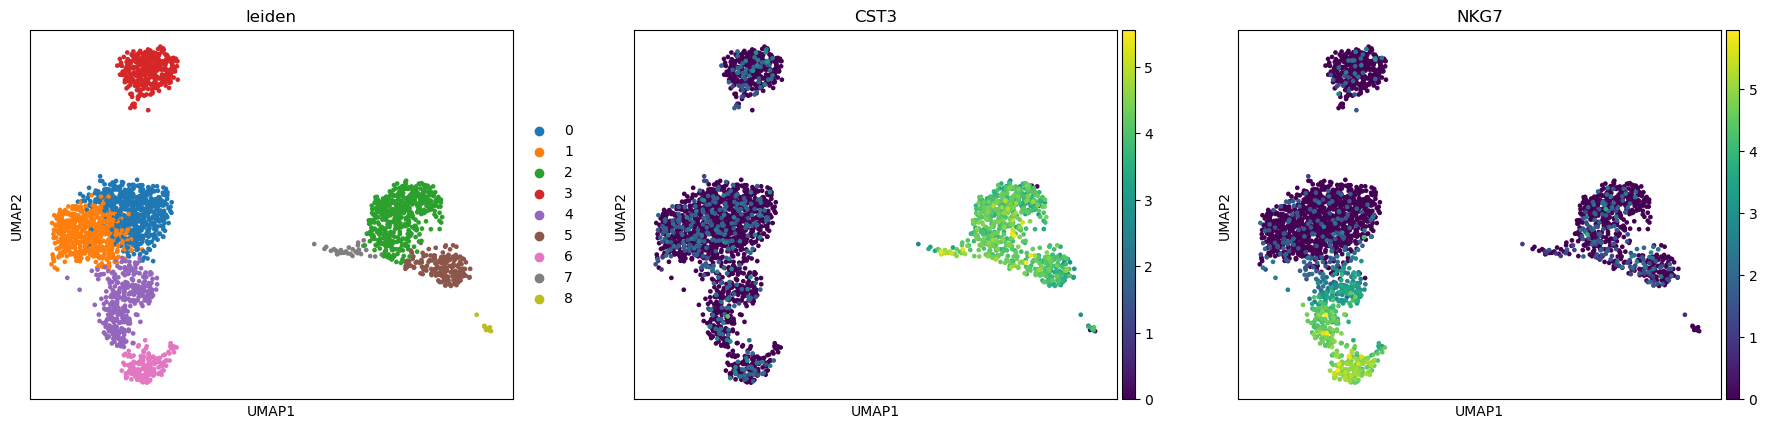

In [73]:
sc.pl.umap(adata, color=['leiden', 'CST3', 'NKG7'])

In [74]:
dtype={"4":"NK","6":"NK"}

In [75]:
for i in range(10):
    if str(i) not in dtype:
        dtype[str(i)]="NA"

In [76]:
dtype["3"]="B"

In [77]:
adata.obs["type"]=[dtype[adata.obs.leiden[item]] for item in adata.obs.index]

C:\Users\liliangcan\anaconda3\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


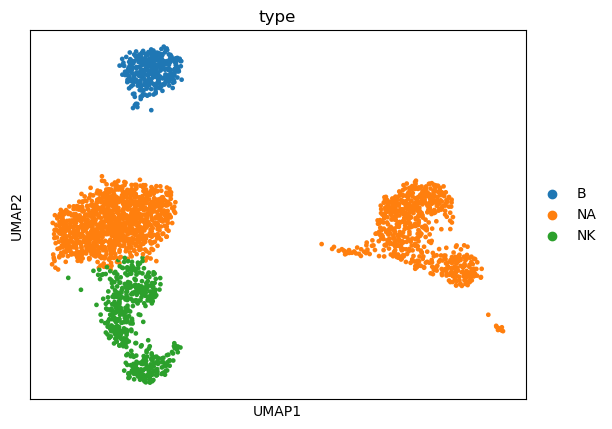

In [78]:
sc.pl.umap(adata,color="type")

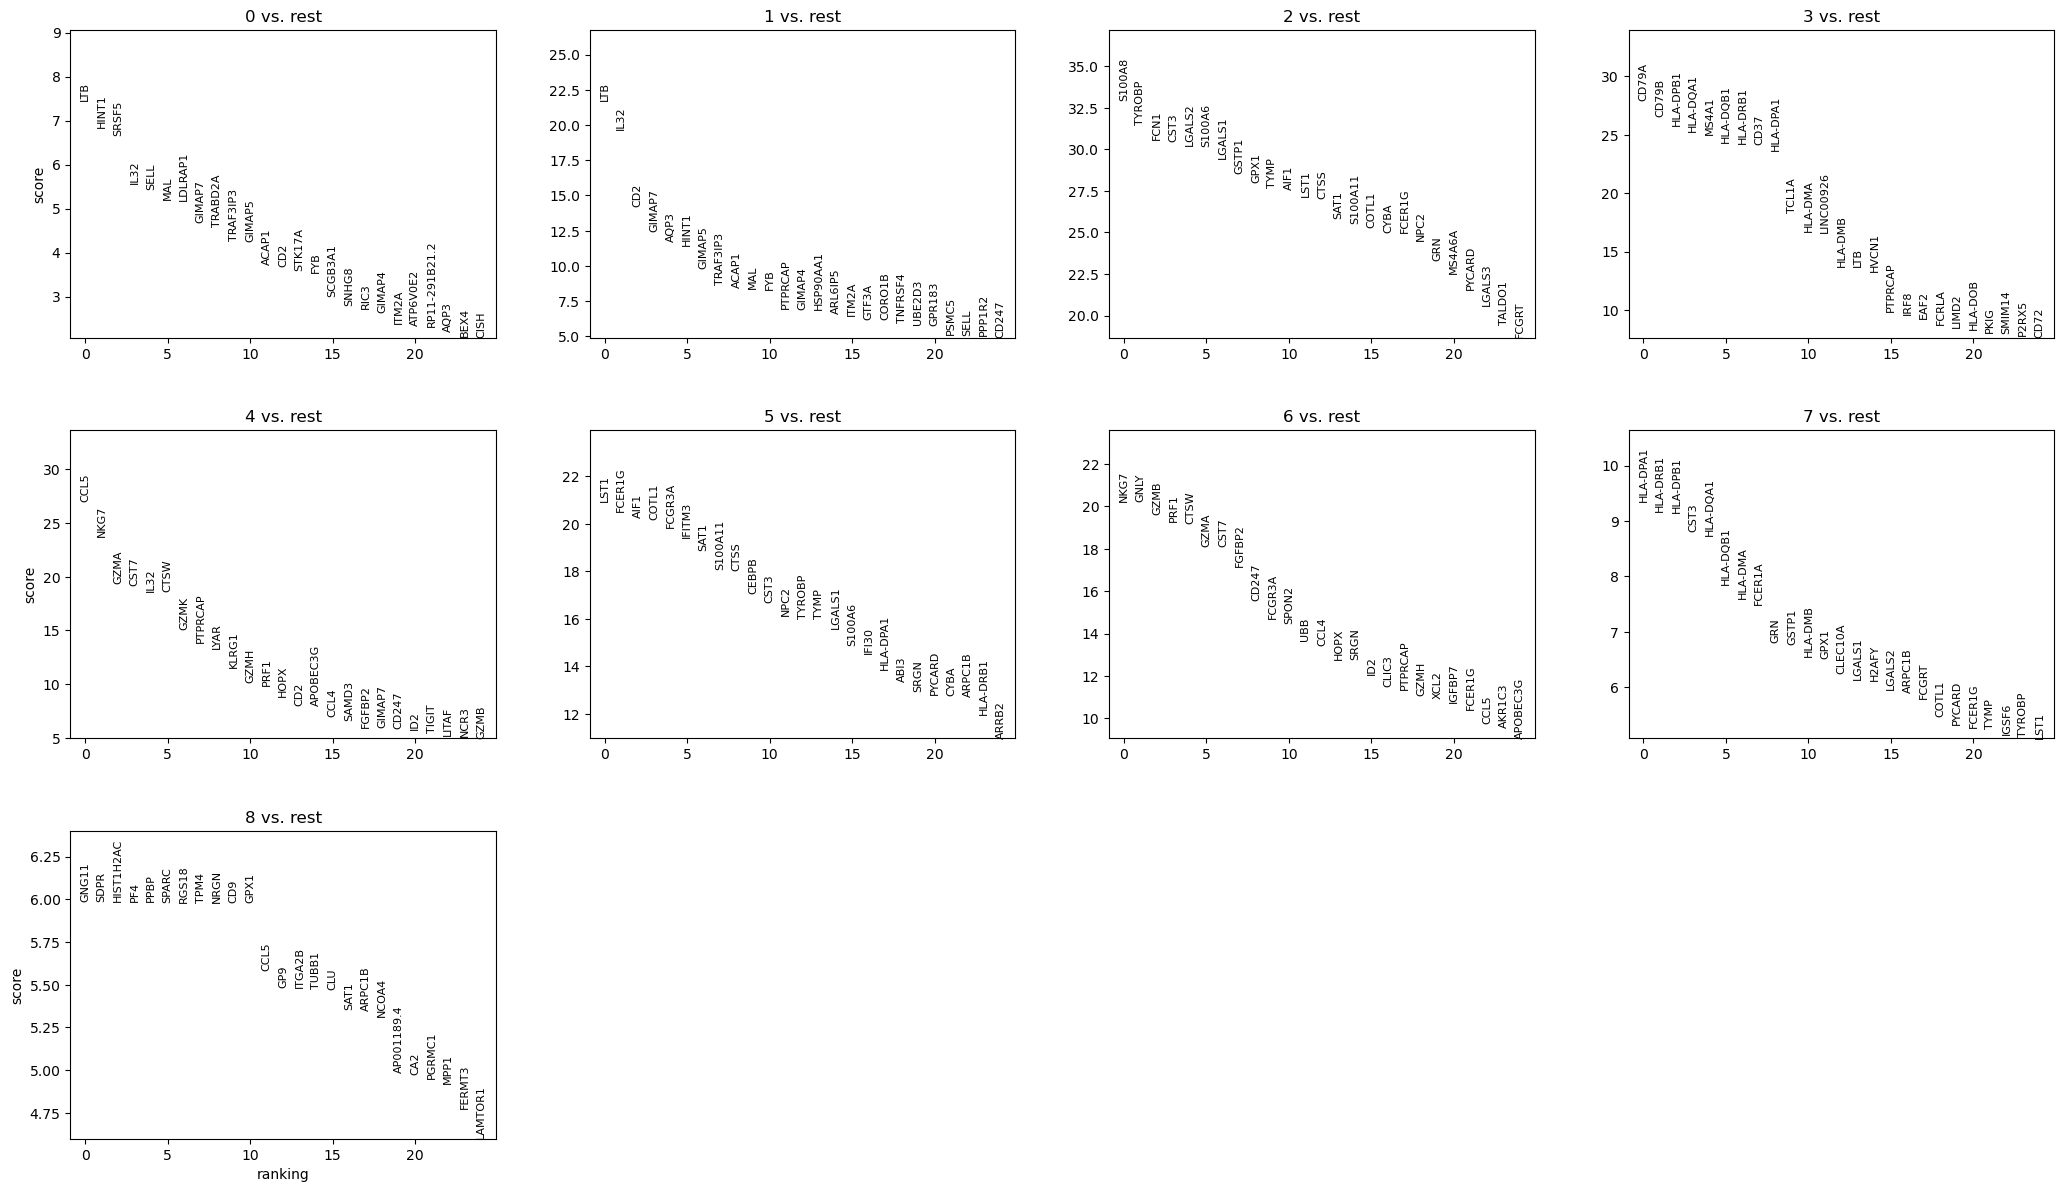

In [79]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [80]:
sc.tl.pca(adata, svd_solver='arpack')

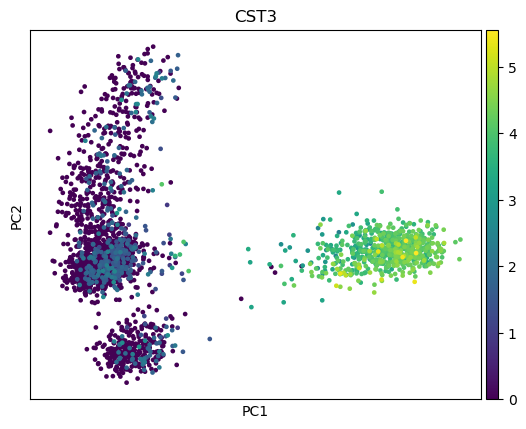

In [81]:
sc.pl.pca(adata, color='CST3')

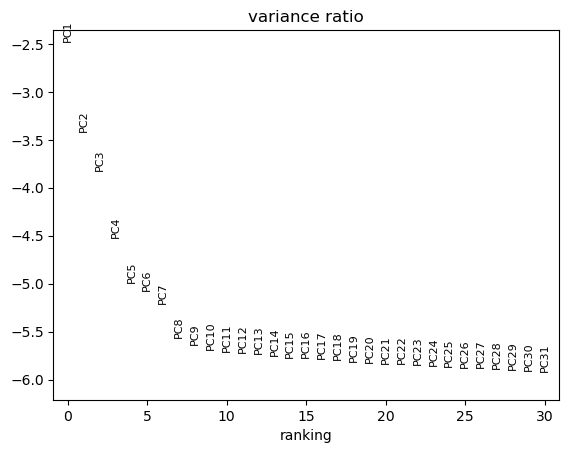

In [82]:
sc.pl.pca_variance_ratio(adata, log=True)

In [83]:
adata.write(results_file)

In [42]:
results_file = 'write/pbmc3k.h5ad'